In [1]:
# https://drive.google.com/file/d/1dB_0ZWGrJRbaTsTn3PaEkrk5XYXDM2_i/view?usp=sharing
!mkdir ./data/

!gdown 1dB_0ZWGrJRbaTsTn3PaEkrk5XYXDM2_i


Downloading...
From (original): https://drive.google.com/uc?id=1dB_0ZWGrJRbaTsTn3PaEkrk5XYXDM2_i
From (redirected): https://drive.google.com/uc?id=1dB_0ZWGrJRbaTsTn3PaEkrk5XYXDM2_i&confirm=t&uuid=35cbeb10-5299-440e-a58b-a7563a002d2c
To: /content/archive.zip
100% 156M/156M [00:03<00:00, 49.5MB/s]


In [2]:
!unzip /content/archive.zip -d /content/data

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/data/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0726.jpg  
  inflating: /content/data/Training/glioma/

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dataset

import random
import matplotlib.pyplot as plt


In [4]:
data_path = {
    'train': '/content/data/Training',
    'valid' : '/content/data/Testing'
}

# classes:

In [5]:
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5],
                         std=[0.25])
])

valid_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5],
                         std=[0.25])
])

train_data = dataset.ImageFolder(data_path['train'], transform=train_transform)
test_data = dataset.ImageFolder(data_path['valid'], transform=valid_transform)

train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True, num_workers=2)
valid_loader = data.DataLoader(test_data, batch_size=128, shuffle=False, num_workers=2)


In [6]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch
import random
import numpy as np


SEED = 42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)


train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# ----------------------
# Dataset
# ----------------------
full_train_dataset = datasets.ImageFolder(
    data_path['train'],
    transform=train_transform
)

# ----------------------
# Split 80 / 20
# ----------------------
train_size = int(0.8 * len(full_train_dataset))
valid_size = len(full_train_dataset) - train_size

train_dataset, valid_dataset = random_split(
    full_train_dataset,
    [train_size, valid_size]
)

valid_dataset.dataset.transform = valid_transform


train_loader = DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True,
    num_workers=2
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=128,
    shuffle=False,
    num_workers=2
)

# ----------------------
# Sanity check
# ----------------------
print(f"Train samples: {len(train_dataset)}")
print(f"Valid samples: {len(valid_dataset)}")
print("Classes:", full_train_dataset.classes)


Train samples: 4569
Valid samples: 1143
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [7]:
test_data = dataset.ImageFolder(data_path['valid'], transform=valid_transform)
test_loader = data.DataLoader(test_data, batch_size=128, shuffle=False, num_workers=2)

In [9]:
class_name=full_train_dataset.classes

In [11]:
train_loader.dataset

In [12]:

count_class_name={
    'glioma': 0, 'meningioma' : 0 , 'notumor':0,'pituitary':0
}
count=[0,0,0,0]
for i,l in train_data:
  count[l]+=1
for i in range(len(count)):
  count_class_name[class_name[i]]=count[i]

In [13]:
count_class_name

{'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}

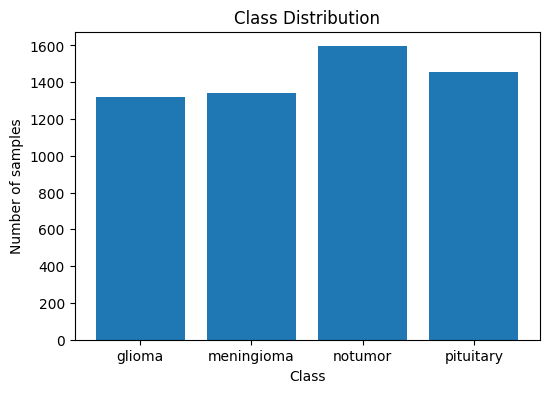

In [14]:
classes = list(count_class_name.keys())
counts = list(count_class_name.values())

plt.figure(figsize=(6,4))
plt.bar(classes, counts)
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class Distribution")
plt.show()

In [15]:
class_name=train_data.classes
class_name

['glioma', 'meningioma', 'notumor', 'pituitary']

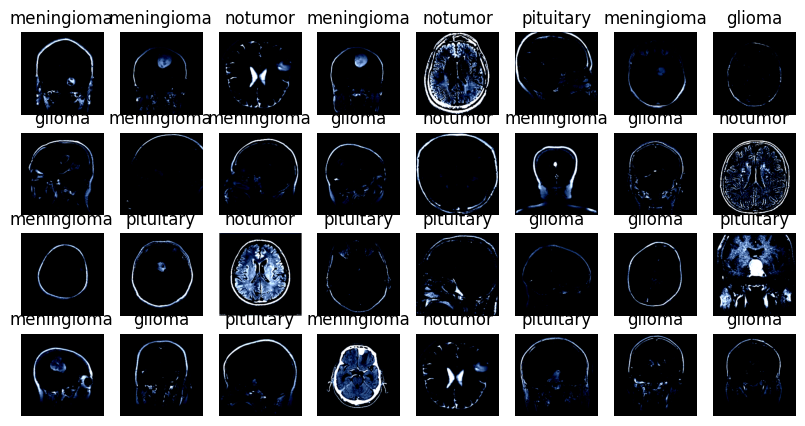

In [20]:
from torch.utils.data import DataLoader
import torchvision

loader = train_loader

images, labels = next(iter(loader))

# tạo grid
grid = torchvision.utils.make_grid(images, nrow=4)

# (C,H,W) → (H,W,C)
# plt.figure(figsize=(4,8))
# plt.imshow(grid.permute(1,2,0))
# plt.axis("off")
# plt.show()
plt.figure(figsize=(10,5))
for i in range(32):
    plt.subplot(4,8,i+1)
    img = images[i].permute(1,2,0)
    plt.imshow(img)
    plt.title(class_name[labels[i]])
    plt.axis("off")
plt.show()

In [18]:
from torchvision.models import resnet18
import torch.nn as nn

model_baseline = resnet18(weights=None)
model_baseline.fc = nn.Linear(model_baseline.fc.in_features, 4)
# model_resnet = model_resnet.to(device) # train from scratch

In [ ]:
# model.conv1 = nn.Conv2d(
#     in_channels=1,
#     out_channels=64,
#     kernel_size=3,
#     stride=1,
#     padding='same',
#     bias=False
# )
# in_features = model.fc.in_features

# model.fc = nn.Sequential(
#     nn.Dropout(p=0.2),
#     nn.Linear(in_features, len(class_name))
)

In [21]:
from torchsummary import summary
device = "cuda" if torch.cuda.is_available else "cpu"
model_baseline = model_baseline.to(device)
summary(model_baseline, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [22]:
import time
def train(model, optimizer, criterion, train_dataloader, device, epoch=0, log_interval=50):
  model.train()

  total_acc, total_count = 0,0
  losses = []
  start_time = time.time()

  for idx, (inputs,labels) in enumerate(train_dataloader):

    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    prediction = model(inputs)

    loss = criterion(prediction,labels)

    losses.append(loss)

    loss.backward()
    optimizer.step()

    total_acc +=(prediction.argmax(1) == labels).sum().item()
    total_count += labels.size(0)

    if idx % log_interval == 0  and idx >0 :
      print(f"| epoch {epoch:3d}|{idx:5d}/{len(train_dataloader):5d} batches| accuracy {total_acc/total_count :8.3f}" )
      total_acc,total_count = 0,0
      start_time = time.time()
    epoch_acc = total_acc /total_count if total_count >0 else 0
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss
def evalurate(model,criterion, cassva_vaild_dataloader,device):
  model.eval()
  total_acc, total_count =0,0
  losses = []

  with torch.no_grad():
    for idx, (inputs, labels) in enumerate(cassva_vaild_dataloader):
      inputs = inputs.to(device)
      labels = labels.to(device)

      prediction = model(inputs)
      loss = criterion(prediction,labels)
      losses.append(loss)

      total_acc += (prediction.argmax(1) == labels ).sum().item()
      total_count += labels.size(0)

  epoch_acc = total_acc / total_count
  epoch_loss = sum(losses)/len(losses)
  return epoch_acc, epoch_loss


In [23]:
import os
model_resnet=model_baseline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_resnet = model_baseline.to(device)
save_model = './model'
model_baseline_best=None
os.makedirs(save_model, exist_ok=True)
critertion_cassva = nn.CrossEntropyLoss()
optimizer_cassva = optim.Adam(model_resnet.parameters(), lr = 2e-4)
num_epochs = 100
train_accs, train_losses = [],[]
eval_accs, eval_losses = [],[]

best_loss_eval = 60

for epoch in range(1, num_epochs+1):

  epoch_start_time = time.time()
#training
  train_acc, train_loss = train(model_resnet,optimizer_cassva,critertion_cassva,train_loader,device=device,epoch=epoch,log_interval=10)

  train_accs.append(train_acc)
  train_losses.append(train_loss.item())

#evaluation

  eval_acc,eval_loss = evalurate(model_resnet,critertion_cassva,valid_loader,device)

  eval_accs.append(eval_acc)
  eval_losses.append(eval_loss.item())

  if eval_loss < best_loss_eval:
        best_loss_eval=eval_loss
        model_baseline_best=model_resnet



  print("-"*90)
  print(f"| End of epoch {epoch:3d} | Time: {time.time() - epoch_start_time:5.2f}s | "
          f"Train Acc: {train_acc:8.3f} | Train Loss: {train_loss:8.3f} | "
          f"Valid Acc: {eval_acc:8.3f} | Valid Loss: {eval_loss:8.3f} |")
  print("-" * 80)



------------------------------------------------------------------------------------------
| End of epoch   1 | Time:  7.42s | Train Acc:    0.352 | Train Loss:    1.354 | Valid Acc:    0.279 | Valid Loss:    6.649 |
--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| End of epoch   2 | Time:  7.16s | Train Acc:    0.586 | Train Loss:    0.911 | Valid Acc:    0.279 | Valid Loss:    6.818 |
--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| End of epoch   3 | Time:  6.80s | Train Acc:    0.664 | Train Loss:    1.085 | Valid Acc:    0.278 | Valid Loss:    4.211 |
--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| End of epoch 

In [24]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score

def evaluate_classification(model, test_loader, device):
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # Gộp batch
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Accuracy
    acc = accuracy_score(all_labels, all_preds)

    # Macro F1
    macro_f1 = f1_score(all_labels, all_preds, average='macro')

    # ----- Class-wise Recall -----
    # Giả sử class order từ ImageFolder:
    # ['glioma', 'meningioma', 'notumor', 'pituitary']
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']


    glioma_idx = class_names.index('glioma')
    meningioma_idx = class_names.index('meningioma')

    recall_per_class = recall_score(
        all_labels,
        all_preds,
        labels=[glioma_idx, meningioma_idx],
        average=None
    )

    glioma_recall = recall_per_class[0]
    meningioma_recall = recall_per_class[1]

    return {
        "accuracy": acc,
        "macro_f1": macro_f1,
        "glioma_recall": glioma_recall,
        "meningioma_recall": meningioma_recall
    }


Accuracy: 0.7704
Macro F1: 0.7396
Glioma Recall: 0.4133
Meningioma Recall: 0.6209


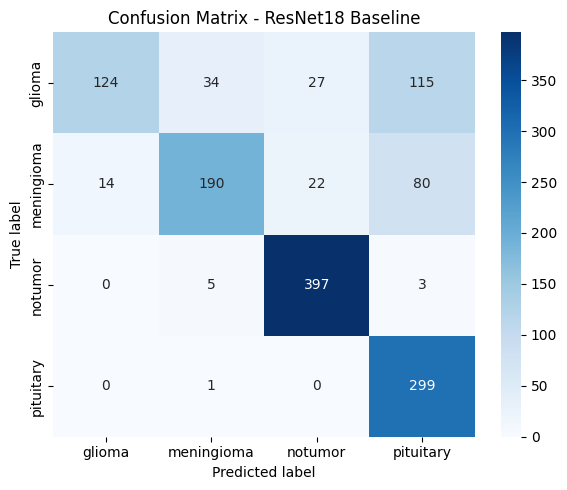

In [27]:

metrics = evaluate_classification(model_baseline_best, test_loader, device)


print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Macro F1: {metrics['macro_f1']:.4f}")
print(f"Glioma Recall: {metrics['glioma_recall']:.4f}")
print(f"Meningioma Recall: {metrics['meningioma_recall']:.4f}")

plot_confusion_matrix(
    model=model_baseline_best,        # model bạn đã load đúng
    dataloader=test_loader,
    device=device,
    title="Confusion Matrix - ResNet18 Baseline"
)


Accuracy: 0.7704
Macro F1: 0.7396
Glioma Recall: 0.4133
Meningioma Recall: 0.6209


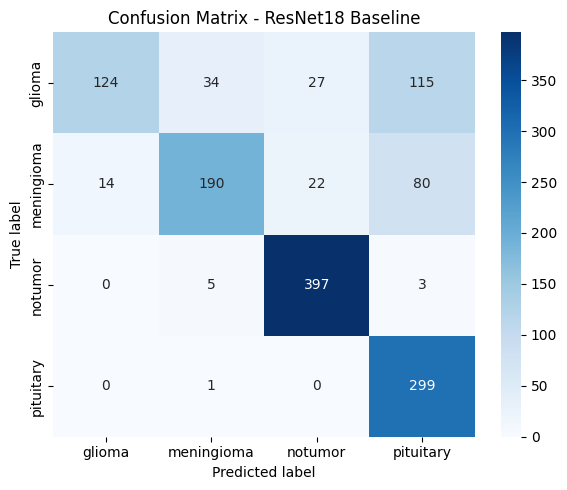

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, dataloader, device, title="Confusion Matrix"):
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    class_names = dataloader.dataset.classes

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

metrics = evaluate_classification(model_baseline_best, test_loader, device)


print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Macro F1: {metrics['macro_f1']:.4f}")
print(f"Glioma Recall: {metrics['glioma_recall']:.4f}")
print(f"Meningioma Recall: {metrics['meningioma_recall']:.4f}")

plot_confusion_matrix(
    model=model_resnet,
    dataloader=test_loader,
    device=device,
    title="Confusion Matrix - ResNet18 Baseline"
)


In [ ]:
import torch
from torchvision.models import resnet18

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

state_dict = torch.load(
    "/content/model/resnet18_baseline_model.pt",
    map_location=device
)

state_dict.pop("fc.weight", None)
state_dict.pop("fc.bias", None)

model_final = resnet18(weights=None)
model_final.fc = torch.nn.Linear(model_final.fc.in_features, 4)

model_final.load_state_dict(state_dict, strict=False)
model_final.to(device)
model_final.eval()

metrics = evaluate_classification(model_final, test_loader, device)

print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Macro F1: {metrics['macro_f1']:.4f}")
print(f"Glioma Recall: {metrics['glioma_recall']:.4f}")
print(f"Meningioma Recall: {metrics['meningioma_recall']:.4f}")
plot_confusion_matrix(
    model=model_resnet,
    dataloader=test_loader,
    device=device,
    title="Confusion Matrix - ResNet18 Baseline"
)

Accuracy: 0.1060
Macro F1: 0.0647
Glioma Recall: 0.0000
Meningioma Recall: 0.0556


Accuracy: 0.7437
Macro F1: 0.6830
Glioma Recall: 0.1300
Meningioma Recall: 0.9771


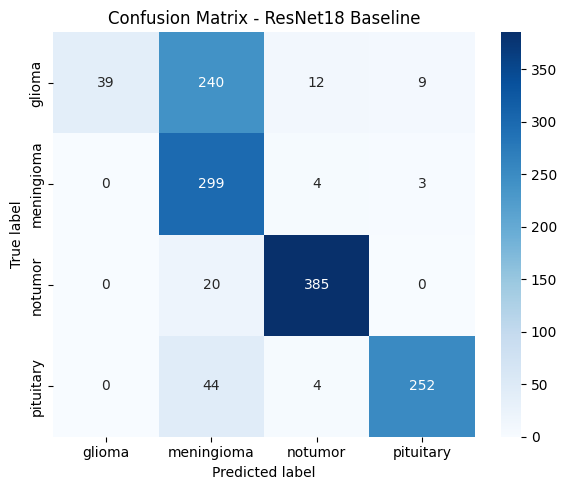

In [ ]:
metrics = evaluate_classification(model_baseline_best, test_loader, device)

print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Macro F1: {metrics['macro_f1']:.4f}")
print(f"Glioma Recall: {metrics['glioma_recall']:.4f}")
print(f"Meningioma Recall: {metrics['meningioma_recall']:.4f}")
plot_confusion_matrix(
    model=model_baseline_best,        # model bạn đã load đúng
    dataloader=test_loader,
    device=device,
    title="Confusion Matrix - ResNet18 Baseline"
)

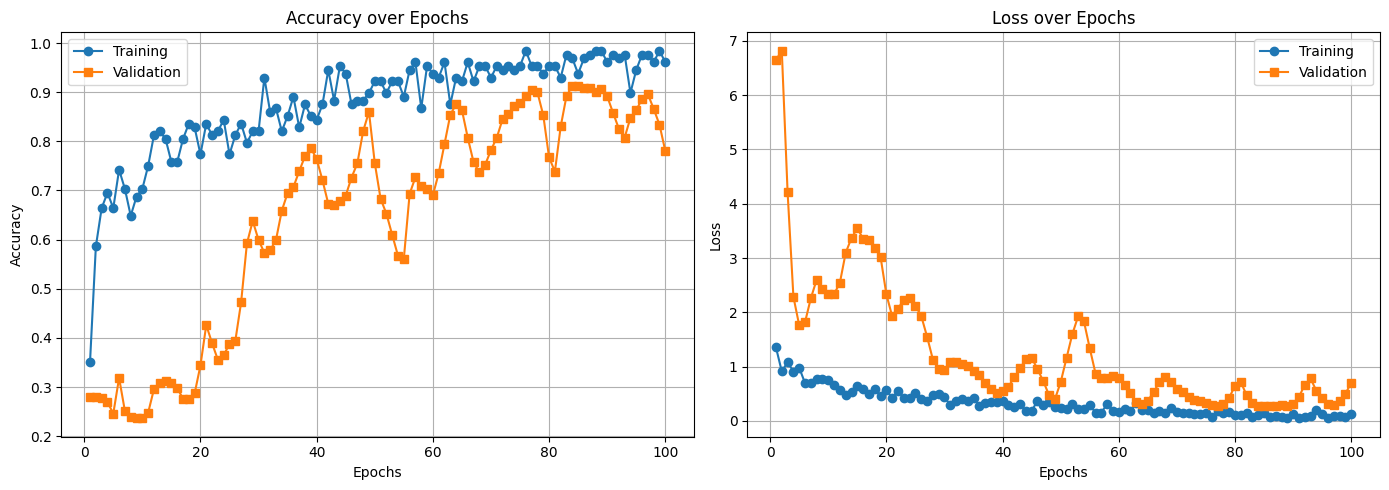

In [29]:
def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(1, num_epochs + 1))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

    axs[0].plot(epochs, train_accs, label="Training", marker='o')
    axs[0].plot(epochs, eval_accs, label="Validation", marker='s')
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_title("Accuracy over Epochs")
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, train_losses, label="Training", marker='o')
    axs[1].plot(epochs, eval_losses, label="Validation", marker='s')
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].set_title("Loss over Epochs")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses)


In [30]:
import torch
import torch.nn.functional as F

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer

        self.activations = None
        self.gradients = None

        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def __call__(self, x, class_idx=None):
        """
        x: input image tensor, shape [1, C, H, W]
        class_idx: class index to visualize
        """
        self.model.zero_grad()
        logits = self.model(x)

        if class_idx is None:
            class_idx = logits.argmax(dim=1).item()

        score = logits[:, class_idx]
        score.backward()

        # gradients: [B, C, H, W]
        # activations: [B, C, H, W]
        weights = self.gradients.mean(dim=(2, 3), keepdim=True)
        cam = (weights * self.activations).sum(dim=1, keepdim=True)

        cam = F.relu(cam)
        cam = F.interpolate(cam, size=x.shape[2:], mode='bilinear', align_corners=False)

        cam = cam.squeeze()
        cam = (cam - cam.min()) / (cam.max() + 1e-8)

        return cam


In [32]:
gradcam = GradCAM(
    model=model_baseline_best,
    target_layer=model_baseline_best.layer4
)

In [33]:
model_baseline_best.eval()
images, labels = next(iter(test_loader))
image = images[0].unsqueeze(0)   # shape [1, C, H, W]
label = labels[0]
# image: tensor shape [1, 1, 150, 150]
image = image.to(device)

cam = gradcam(image)


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


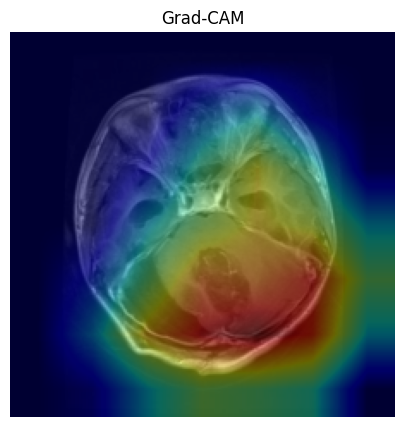

In [34]:
import matplotlib.pyplot as plt
import torch
import numpy as np

img = image.squeeze().cpu()


mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

img = img * std + mean
img = torch.clamp(img, 0, 1)
img = img.numpy()


if torch.is_tensor(cam):
    cam = cam.cpu().numpy()

plt.figure(figsize=(5,5))
plt.imshow(img.transpose(1, 2, 0))
plt.imshow(cam, cmap='jet', alpha=0.4)
plt.axis('off')
plt.title('Grad-CAM')
plt.show()

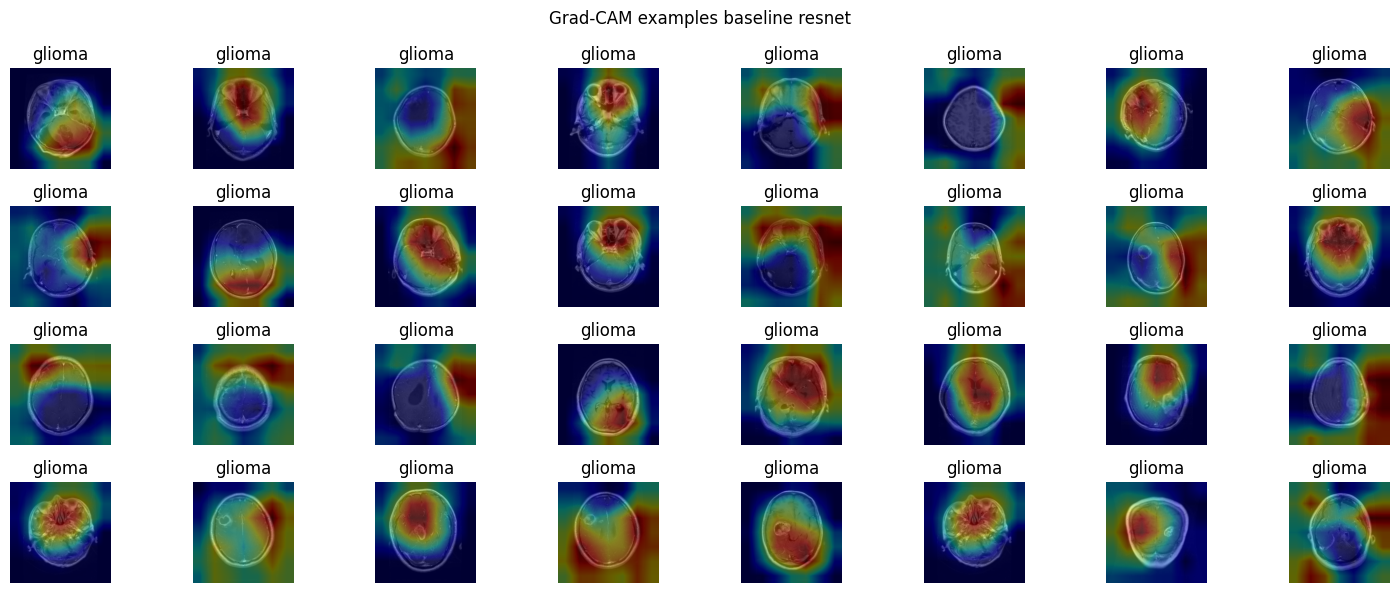

In [41]:
import matplotlib.pyplot as plt

# Define class_name for this cell's scope
class_name = train_data.classes

N = 32  # số ảnh muốn vẽ
fig, axes = plt.subplots(4,8, figsize=(15, 6))

# Compute Grad-CAM for the first N images
all_cams = []
for i in range(N):
    # Ensure the input to gradcam is unsqueezed to have batch dimension
    current_image = images[i].unsqueeze(0).to(device)
    cam = gradcam(current_image) # No class_idx needed here as it's handled by argmax
    all_cams.append(cam)

for i, ax in enumerate(axes.flat):
    if i < len(all_cams):
        # Get original image and unnormalize
        img_display = images[i].squeeze().cpu()
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

        img_display = img_display * std + mean # Unnormalize
        img_display = torch.clamp(img_display, 0, 1) # Clip values to [0, 1]
        img_display = img_display.numpy()

        cam_plot = all_cams[i].cpu().numpy()

        ax.imshow(img_display.transpose(1, 2, 0)) # Permute to (H, W, C) for RGB images
        ax.imshow(cam_plot, cmap='jet', alpha=0.4)
        ax.axis('off')
        ax.set_title(class_name[labels[i]]) # Added class name to title

plt.suptitle('Grad-CAM examples baseline resnet')
plt.tight_layout()
plt.show()

In [36]:
import torch
import torch.nn as nn
from torchvision.models.resnet import ResNet, BasicBlock

# =========================
# Squeeze-and-Excitation Block
# =========================
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y


# =========================
# SE-ResNet BasicBlock
# =========================
class SEBasicBlock(BasicBlock):
    def __init__(self, *args, reduction=16, **kwargs):
        super().__init__(*args, **kwargs)
        self.se = SEBlock(self.conv2.out_channels, reduction)

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out = self.se(out)   # ⭐ SE attention

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


# =========================
# SE-ResNet18
# =========================
def se_resnet18(num_classes=4):
    model = ResNet(
        block=SEBasicBlock,
        layers=[2, 2, 2, 2],
        num_classes=num_classes
    )
    return model


# =========================
# INIT MODEL
# =========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_se = se_resnet18(num_classes=4)
# model_se = model_se.to(device)

print("✅ SE-ResNet18 initialized")


✅ SE-ResNet18 initialized


In [37]:
import os
model_resnet_se=model_se
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_resnet_se = model_resnet_se.to(device)
save_model = './model'
os.makedirs(save_model, exist_ok=True)
critertion_cassva = nn.CrossEntropyLoss()
optimizer_cassva = optim.Adam(model_resnet_se.parameters(), lr = 2e-4)
num_epochs = 100
train_accs, train_losses = [],[]
eval_accs, eval_losses = [],[]
model_se_best = None
best_loss_eval = 60

for epoch in range(1, num_epochs+1):

  epoch_start_time = time.time()
#training
  train_acc, train_loss = train(model_resnet_se,optimizer_cassva,critertion_cassva,train_loader,device=device,epoch=epoch,log_interval=10)

  train_accs.append(train_acc)
  train_losses.append(train_loss.item())

#evaluation

  eval_acc,eval_loss = evalurate(model_resnet_se,critertion_cassva,valid_loader,device)

  eval_accs.append(eval_acc)
  eval_losses.append(eval_loss.item())

  if eval_loss < best_loss_eval:
        best_loss_eval = eval_loss
        model_se_best = model_resnet_se


  print("-"*90)
  print(f"| End of epoch {epoch:3d} | Time: {time.time() - epoch_start_time:5.2f}s | "
          f"Train Acc: {train_acc:8.3f} | Train Loss: {train_loss:8.3f} | "
          f"Valid Acc: {eval_acc:8.3f} | Valid Loss: {eval_loss:8.3f} |")
  print("-" * 80)

------------------------------------------------------------------------------------------
| End of epoch   1 | Time:  8.04s | Train Acc:    0.273 | Train Loss:    1.439 | Valid Acc:    0.279 | Valid Loss:    1.441 |
--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| End of epoch   2 | Time:  6.55s | Train Acc:    0.391 | Train Loss:    1.160 | Valid Acc:    0.279 | Valid Loss:    1.355 |
--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| End of epoch   3 | Time:  8.64s | Train Acc:    0.602 | Train Loss:    1.069 | Valid Acc:    0.327 | Valid Loss:    1.305 |
--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| End of epoch 

Accuracy: 0.8558
Macro F1: 0.8475
Glioma Recall: 0.7100
Meningioma Recall: 0.7353


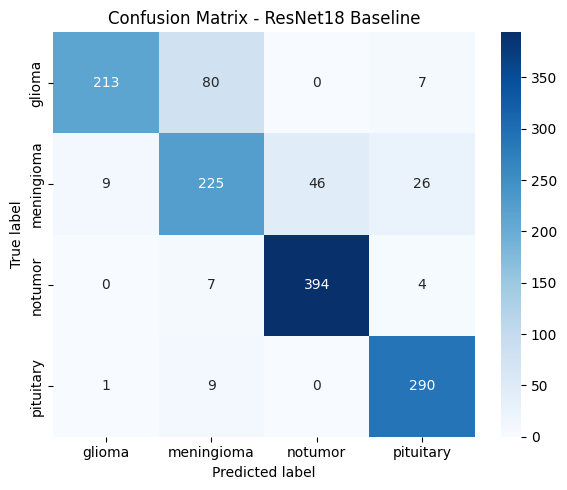

In [38]:

metrics = evaluate_classification(model_se_best, test_loader, device)


print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Macro F1: {metrics['macro_f1']:.4f}")
print(f"Glioma Recall: {metrics['glioma_recall']:.4f}")
print(f"Meningioma Recall: {metrics['meningioma_recall']:.4f}")
plot_confusion_matrix(
    model=model_se_best,
    dataloader=test_loader,
    device=device,
    title="Confusion Matrix - ResNet18 Baseline"
)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


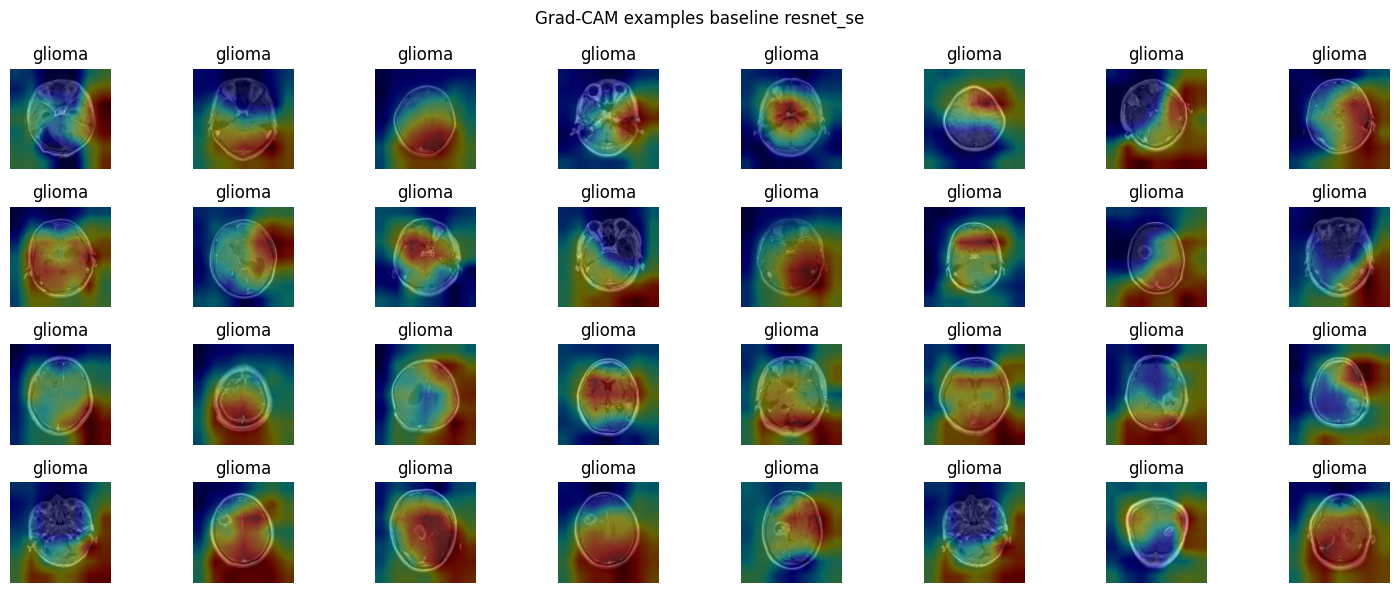

In [40]:
gradcam_se = GradCAM(
    model=model_se_best,
    target_layer=model_se_best.layer4
)
import matplotlib.pyplot as plt

class_name = train_data.classes

N = 32
fig, axes = plt.subplots(4,8, figsize=(15, 6))

all_cams = []
for i in range(N):
    current_image = images[i].unsqueeze(0).to(device)
    cam = gradcam_se(current_image)
    all_cams.append(cam)

for i, ax in enumerate(axes.flat):
    if i < len(all_cams):
        img_display = images[i].squeeze().cpu()
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

        img_display = img_display * std + mean
        img_display = torch.clamp(img_display, 0, 1)
        img_display = img_display.numpy()

        cam_plot = all_cams[i].cpu().numpy()

        ax.imshow(img_display.transpose(1, 2, 0))
        ax.imshow(cam_plot, cmap='jet', alpha=0.4)
        ax.axis('off')
        ax.set_title(class_name[labels[i]])
plt.tight_layout()
plt.show()